# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"

data_dir = "/input"

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:11<00:00, 5.25KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

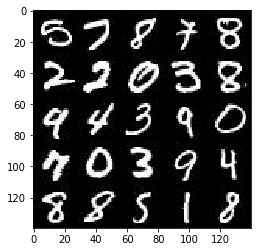

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

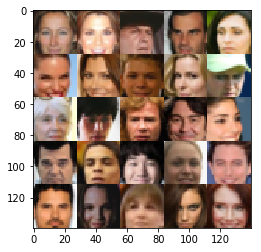

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))


## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function 

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate' ,shape=())

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
    
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

tests.test_discriminator(discriminator, tf)
    


Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out 

    
    
    #return None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)


 

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7445... Generator Loss: 0.9548
Epoch 1/2... Discriminator Loss: 0.4303... Generator Loss: 1.3436
Epoch 1/2... Discriminator Loss: 0.3109... Generator Loss: 1.9506
Epoch 1/2... Discriminator Loss: 1.3066... Generator Loss: 0.5263
Epoch 1/2... Discriminator Loss: 0.9105... Generator Loss: 3.1360
Epoch 1/2... Discriminator Loss: 0.8751... Generator Loss: 1.0146
Epoch 1/2... Discriminator Loss: 0.6640... Generator Loss: 1.0623
Epoch 1/2... Discriminator Loss: 0.4158... Generator Loss: 1.6001
Epoch 1/2... Discriminator Loss: 0.2554... Generator Loss: 2.7460
Epoch 1/2... Discriminator Loss: 0.1468... Generator Loss: 3.0414


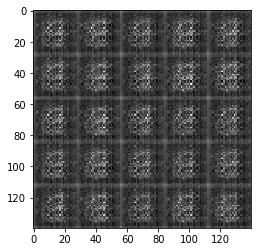

Epoch 1/2... Discriminator Loss: 0.1928... Generator Loss: 2.6729
Epoch 1/2... Discriminator Loss: 0.2416... Generator Loss: 2.7548
Epoch 1/2... Discriminator Loss: 0.2710... Generator Loss: 2.2837
Epoch 1/2... Discriminator Loss: 0.1234... Generator Loss: 2.9853
Epoch 1/2... Discriminator Loss: 0.2183... Generator Loss: 2.1982
Epoch 1/2... Discriminator Loss: 0.1198... Generator Loss: 3.1974
Epoch 1/2... Discriminator Loss: 0.1666... Generator Loss: 2.4805
Epoch 1/2... Discriminator Loss: 0.3283... Generator Loss: 1.8233
Epoch 1/2... Discriminator Loss: 0.1583... Generator Loss: 2.8708
Epoch 1/2... Discriminator Loss: 0.1139... Generator Loss: 2.9719


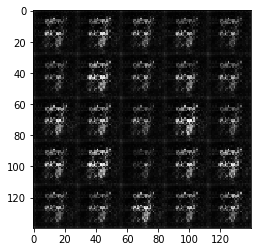

Epoch 1/2... Discriminator Loss: 0.1312... Generator Loss: 3.1532
Epoch 1/2... Discriminator Loss: 0.0880... Generator Loss: 3.2848
Epoch 1/2... Discriminator Loss: 0.0742... Generator Loss: 3.2689
Epoch 1/2... Discriminator Loss: 0.1688... Generator Loss: 2.8185
Epoch 1/2... Discriminator Loss: 0.1887... Generator Loss: 2.9887
Epoch 1/2... Discriminator Loss: 0.1504... Generator Loss: 2.6776
Epoch 1/2... Discriminator Loss: 0.1586... Generator Loss: 2.5607
Epoch 1/2... Discriminator Loss: 0.1345... Generator Loss: 2.6301
Epoch 1/2... Discriminator Loss: 0.1113... Generator Loss: 3.2752
Epoch 1/2... Discriminator Loss: 0.1442... Generator Loss: 2.9836


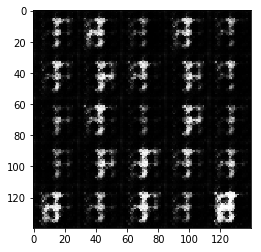

Epoch 1/2... Discriminator Loss: 0.0847... Generator Loss: 3.2065
Epoch 1/2... Discriminator Loss: 0.1256... Generator Loss: 3.0810
Epoch 1/2... Discriminator Loss: 0.2918... Generator Loss: 1.8614
Epoch 1/2... Discriminator Loss: 0.1340... Generator Loss: 3.4613
Epoch 1/2... Discriminator Loss: 0.1559... Generator Loss: 2.7970
Epoch 1/2... Discriminator Loss: 0.3233... Generator Loss: 1.6360
Epoch 1/2... Discriminator Loss: 0.1026... Generator Loss: 3.0378
Epoch 1/2... Discriminator Loss: 0.1078... Generator Loss: 3.8134
Epoch 1/2... Discriminator Loss: 0.1937... Generator Loss: 3.2172
Epoch 1/2... Discriminator Loss: 0.2406... Generator Loss: 2.5549


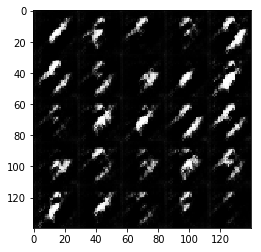

Epoch 1/2... Discriminator Loss: 0.1607... Generator Loss: 2.8676
Epoch 1/2... Discriminator Loss: 0.1533... Generator Loss: 2.7550
Epoch 1/2... Discriminator Loss: 0.1580... Generator Loss: 3.5002
Epoch 1/2... Discriminator Loss: 0.2190... Generator Loss: 3.1987
Epoch 1/2... Discriminator Loss: 0.2261... Generator Loss: 2.2576
Epoch 1/2... Discriminator Loss: 0.1427... Generator Loss: 3.3760
Epoch 1/2... Discriminator Loss: 0.2318... Generator Loss: 2.6945
Epoch 1/2... Discriminator Loss: 0.1936... Generator Loss: 3.1000
Epoch 1/2... Discriminator Loss: 0.5896... Generator Loss: 5.9593
Epoch 1/2... Discriminator Loss: 0.2266... Generator Loss: 2.6379


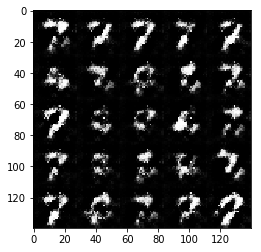

Epoch 1/2... Discriminator Loss: 0.8178... Generator Loss: 0.8520
Epoch 1/2... Discriminator Loss: 0.3122... Generator Loss: 2.5095
Epoch 1/2... Discriminator Loss: 0.2363... Generator Loss: 2.7616
Epoch 1/2... Discriminator Loss: 0.3220... Generator Loss: 1.9533
Epoch 1/2... Discriminator Loss: 0.2985... Generator Loss: 2.8748
Epoch 1/2... Discriminator Loss: 0.5262... Generator Loss: 1.6196
Epoch 1/2... Discriminator Loss: 0.2350... Generator Loss: 2.2103
Epoch 1/2... Discriminator Loss: 0.3484... Generator Loss: 2.2768
Epoch 1/2... Discriminator Loss: 0.2281... Generator Loss: 3.3637
Epoch 1/2... Discriminator Loss: 0.3334... Generator Loss: 1.9926


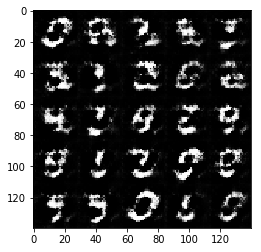

Epoch 1/2... Discriminator Loss: 0.4431... Generator Loss: 1.7369
Epoch 1/2... Discriminator Loss: 0.3000... Generator Loss: 3.0367
Epoch 1/2... Discriminator Loss: 0.4501... Generator Loss: 3.0627
Epoch 1/2... Discriminator Loss: 0.2668... Generator Loss: 2.3250
Epoch 1/2... Discriminator Loss: 0.4261... Generator Loss: 2.3138
Epoch 1/2... Discriminator Loss: 0.3235... Generator Loss: 3.1536
Epoch 1/2... Discriminator Loss: 0.3186... Generator Loss: 2.3141
Epoch 1/2... Discriminator Loss: 0.9919... Generator Loss: 4.7058
Epoch 1/2... Discriminator Loss: 0.3400... Generator Loss: 2.7910
Epoch 1/2... Discriminator Loss: 0.4974... Generator Loss: 1.4659


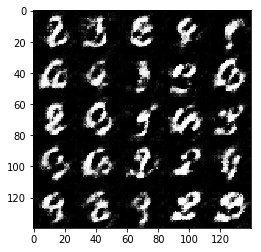

Epoch 1/2... Discriminator Loss: 0.4486... Generator Loss: 1.9324
Epoch 1/2... Discriminator Loss: 1.8133... Generator Loss: 5.0259
Epoch 1/2... Discriminator Loss: 0.7668... Generator Loss: 0.9936
Epoch 1/2... Discriminator Loss: 0.4530... Generator Loss: 2.4526
Epoch 1/2... Discriminator Loss: 0.6014... Generator Loss: 1.6359
Epoch 1/2... Discriminator Loss: 0.4406... Generator Loss: 2.0690
Epoch 1/2... Discriminator Loss: 0.7045... Generator Loss: 2.3651
Epoch 1/2... Discriminator Loss: 0.5618... Generator Loss: 2.0906
Epoch 1/2... Discriminator Loss: 0.3222... Generator Loss: 2.2495
Epoch 1/2... Discriminator Loss: 0.3982... Generator Loss: 1.8625


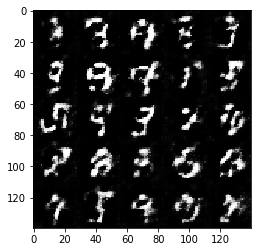

Epoch 1/2... Discriminator Loss: 0.4359... Generator Loss: 1.9614
Epoch 1/2... Discriminator Loss: 0.4796... Generator Loss: 1.2985
Epoch 1/2... Discriminator Loss: 0.3820... Generator Loss: 1.8273
Epoch 1/2... Discriminator Loss: 0.3749... Generator Loss: 1.8850
Epoch 1/2... Discriminator Loss: 0.6537... Generator Loss: 1.1775
Epoch 1/2... Discriminator Loss: 0.4526... Generator Loss: 2.1177
Epoch 1/2... Discriminator Loss: 1.2708... Generator Loss: 4.8311
Epoch 1/2... Discriminator Loss: 0.6158... Generator Loss: 1.6542
Epoch 1/2... Discriminator Loss: 0.6311... Generator Loss: 2.3575
Epoch 1/2... Discriminator Loss: 0.4313... Generator Loss: 1.7304


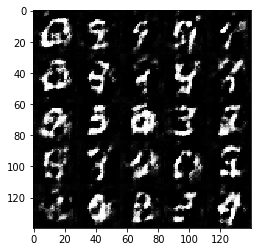

Epoch 1/2... Discriminator Loss: 0.6072... Generator Loss: 3.1176
Epoch 1/2... Discriminator Loss: 0.5548... Generator Loss: 1.2290
Epoch 1/2... Discriminator Loss: 0.3210... Generator Loss: 2.0755
Epoch 2/2... Discriminator Loss: 0.5162... Generator Loss: 2.8158
Epoch 2/2... Discriminator Loss: 0.5644... Generator Loss: 2.9580
Epoch 2/2... Discriminator Loss: 0.4665... Generator Loss: 1.4329
Epoch 2/2... Discriminator Loss: 0.5806... Generator Loss: 1.4415
Epoch 2/2... Discriminator Loss: 0.6501... Generator Loss: 1.0862
Epoch 2/2... Discriminator Loss: 0.6197... Generator Loss: 2.8584
Epoch 2/2... Discriminator Loss: 0.7505... Generator Loss: 3.0358


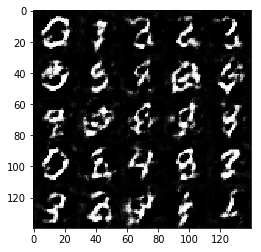

Epoch 2/2... Discriminator Loss: 0.7427... Generator Loss: 0.8979
Epoch 2/2... Discriminator Loss: 0.4499... Generator Loss: 1.9304
Epoch 2/2... Discriminator Loss: 0.7222... Generator Loss: 1.0731
Epoch 2/2... Discriminator Loss: 0.4549... Generator Loss: 1.4346
Epoch 2/2... Discriminator Loss: 0.6019... Generator Loss: 3.0603
Epoch 2/2... Discriminator Loss: 0.3864... Generator Loss: 2.0532
Epoch 2/2... Discriminator Loss: 0.6692... Generator Loss: 1.0625
Epoch 2/2... Discriminator Loss: 0.4790... Generator Loss: 1.4951
Epoch 2/2... Discriminator Loss: 0.5179... Generator Loss: 1.7086
Epoch 2/2... Discriminator Loss: 0.5926... Generator Loss: 1.5331


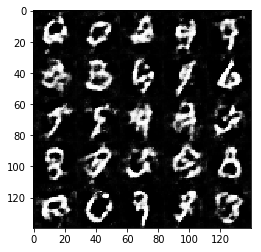

Epoch 2/2... Discriminator Loss: 0.6894... Generator Loss: 2.7308
Epoch 2/2... Discriminator Loss: 0.7919... Generator Loss: 0.8472
Epoch 2/2... Discriminator Loss: 0.9824... Generator Loss: 3.3668
Epoch 2/2... Discriminator Loss: 0.9696... Generator Loss: 0.6614
Epoch 2/2... Discriminator Loss: 0.5712... Generator Loss: 1.3588
Epoch 2/2... Discriminator Loss: 0.5274... Generator Loss: 1.5397
Epoch 2/2... Discriminator Loss: 0.7976... Generator Loss: 0.7970
Epoch 2/2... Discriminator Loss: 1.0308... Generator Loss: 0.6786
Epoch 2/2... Discriminator Loss: 0.5027... Generator Loss: 1.9602
Epoch 2/2... Discriminator Loss: 0.6198... Generator Loss: 1.2126


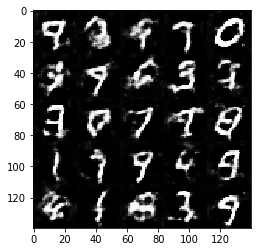

Epoch 2/2... Discriminator Loss: 0.7228... Generator Loss: 0.9567
Epoch 2/2... Discriminator Loss: 0.4835... Generator Loss: 1.8849
Epoch 2/2... Discriminator Loss: 0.5260... Generator Loss: 1.7712
Epoch 2/2... Discriminator Loss: 0.6131... Generator Loss: 2.3383
Epoch 2/2... Discriminator Loss: 0.4481... Generator Loss: 2.0741
Epoch 2/2... Discriminator Loss: 0.8317... Generator Loss: 2.7246
Epoch 2/2... Discriminator Loss: 0.5687... Generator Loss: 1.3163
Epoch 2/2... Discriminator Loss: 0.6840... Generator Loss: 0.9809
Epoch 2/2... Discriminator Loss: 0.5172... Generator Loss: 1.7563
Epoch 2/2... Discriminator Loss: 1.2540... Generator Loss: 0.5123


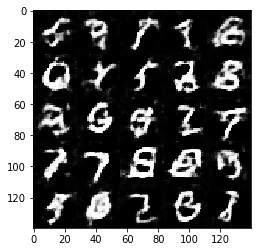

Epoch 2/2... Discriminator Loss: 0.6849... Generator Loss: 1.1734
Epoch 2/2... Discriminator Loss: 0.6051... Generator Loss: 1.1016
Epoch 2/2... Discriminator Loss: 0.5717... Generator Loss: 1.3365
Epoch 2/2... Discriminator Loss: 1.0425... Generator Loss: 0.5579
Epoch 2/2... Discriminator Loss: 0.5594... Generator Loss: 1.3006
Epoch 2/2... Discriminator Loss: 0.6082... Generator Loss: 1.9112
Epoch 2/2... Discriminator Loss: 0.8347... Generator Loss: 0.8087
Epoch 2/2... Discriminator Loss: 0.4661... Generator Loss: 1.9444
Epoch 2/2... Discriminator Loss: 0.4434... Generator Loss: 1.6492
Epoch 2/2... Discriminator Loss: 0.8937... Generator Loss: 0.7052


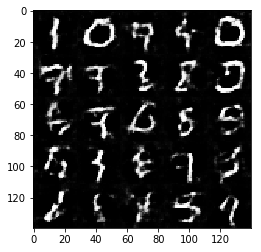

Epoch 2/2... Discriminator Loss: 0.6462... Generator Loss: 1.0371
Epoch 2/2... Discriminator Loss: 0.6445... Generator Loss: 1.1340
Epoch 2/2... Discriminator Loss: 0.5288... Generator Loss: 1.7370
Epoch 2/2... Discriminator Loss: 0.6279... Generator Loss: 1.1716
Epoch 2/2... Discriminator Loss: 0.7783... Generator Loss: 0.9102
Epoch 2/2... Discriminator Loss: 0.6211... Generator Loss: 1.1942
Epoch 2/2... Discriminator Loss: 0.5852... Generator Loss: 1.5585
Epoch 2/2... Discriminator Loss: 0.6445... Generator Loss: 2.1897
Epoch 2/2... Discriminator Loss: 0.7752... Generator Loss: 2.3487
Epoch 2/2... Discriminator Loss: 0.6992... Generator Loss: 1.0340


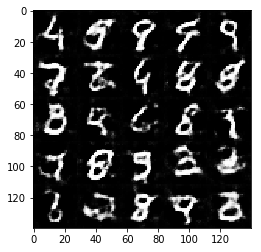

Epoch 2/2... Discriminator Loss: 0.9854... Generator Loss: 0.6493
Epoch 2/2... Discriminator Loss: 0.6312... Generator Loss: 1.2806
Epoch 2/2... Discriminator Loss: 0.5018... Generator Loss: 1.4794
Epoch 2/2... Discriminator Loss: 0.6475... Generator Loss: 1.0511
Epoch 2/2... Discriminator Loss: 0.6104... Generator Loss: 1.3989
Epoch 2/2... Discriminator Loss: 0.6378... Generator Loss: 2.1745
Epoch 2/2... Discriminator Loss: 0.6909... Generator Loss: 1.0399
Epoch 2/2... Discriminator Loss: 0.7366... Generator Loss: 1.6093
Epoch 2/2... Discriminator Loss: 0.6920... Generator Loss: 1.1266
Epoch 2/2... Discriminator Loss: 0.9545... Generator Loss: 2.8012


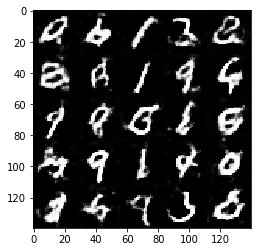

Epoch 2/2... Discriminator Loss: 0.7576... Generator Loss: 2.2930
Epoch 2/2... Discriminator Loss: 0.9389... Generator Loss: 0.6423
Epoch 2/2... Discriminator Loss: 1.1751... Generator Loss: 2.5770
Epoch 2/2... Discriminator Loss: 0.7346... Generator Loss: 0.9365
Epoch 2/2... Discriminator Loss: 0.7428... Generator Loss: 1.0198
Epoch 2/2... Discriminator Loss: 0.7070... Generator Loss: 0.9822
Epoch 2/2... Discriminator Loss: 0.7809... Generator Loss: 1.4361
Epoch 2/2... Discriminator Loss: 0.6085... Generator Loss: 1.2123
Epoch 2/2... Discriminator Loss: 0.5899... Generator Loss: 1.3509
Epoch 2/2... Discriminator Loss: 0.6146... Generator Loss: 1.6053


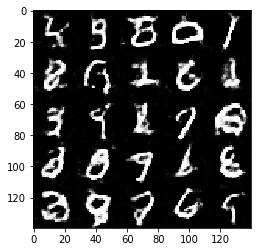

Epoch 2/2... Discriminator Loss: 0.5286... Generator Loss: 1.4030
Epoch 2/2... Discriminator Loss: 0.6065... Generator Loss: 1.1690
Epoch 2/2... Discriminator Loss: 0.9081... Generator Loss: 0.7425
Epoch 2/2... Discriminator Loss: 0.7926... Generator Loss: 0.8849
Epoch 2/2... Discriminator Loss: 0.5569... Generator Loss: 1.3451
Epoch 2/2... Discriminator Loss: 0.6410... Generator Loss: 1.0770
Epoch 2/2... Discriminator Loss: 0.6218... Generator Loss: 2.1422
Epoch 2/2... Discriminator Loss: 0.7472... Generator Loss: 0.8685
Epoch 2/2... Discriminator Loss: 0.6296... Generator Loss: 1.8767
Epoch 2/2... Discriminator Loss: 0.7040... Generator Loss: 1.0260


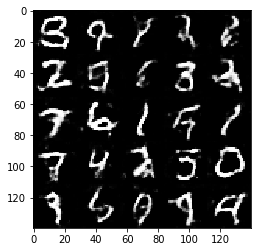

Epoch 2/2... Discriminator Loss: 0.4911... Generator Loss: 1.6354
Epoch 2/2... Discriminator Loss: 0.6619... Generator Loss: 0.9768
Epoch 2/2... Discriminator Loss: 0.4611... Generator Loss: 1.4542
Epoch 2/2... Discriminator Loss: 0.5872... Generator Loss: 1.4778
Epoch 2/2... Discriminator Loss: 0.4236... Generator Loss: 1.8411
Epoch 2/2... Discriminator Loss: 0.4866... Generator Loss: 1.7465
Epoch 2/2... Discriminator Loss: 0.5946... Generator Loss: 1.1513


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.8650... Generator Loss: 0.3548
Epoch 1/1... Discriminator Loss: 0.8356... Generator Loss: 1.1579
Epoch 1/1... Discriminator Loss: 0.4788... Generator Loss: 1.6309
Epoch 1/1... Discriminator Loss: 0.4186... Generator Loss: 1.8141
Epoch 1/1... Discriminator Loss: 0.2841... Generator Loss: 1.9772
Epoch 1/1... Discriminator Loss: 0.4179... Generator Loss: 1.9481
Epoch 1/1... Discriminator Loss: 0.3106... Generator Loss: 2.0116
Epoch 1/1... Discriminator Loss: 0.2159... Generator Loss: 2.3711
Epoch 1/1... Discriminator Loss: 0.2809... Generator Loss: 1.9333
Epoch 1/1... Discriminator Loss: 0.2820... Generator Loss: 2.1098


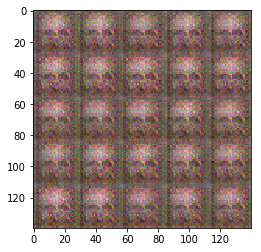

Epoch 1/1... Discriminator Loss: 0.2929... Generator Loss: 1.7705
Epoch 1/1... Discriminator Loss: 0.2071... Generator Loss: 2.4861
Epoch 1/1... Discriminator Loss: 0.1632... Generator Loss: 2.6915
Epoch 1/1... Discriminator Loss: 0.1786... Generator Loss: 2.4447
Epoch 1/1... Discriminator Loss: 0.3064... Generator Loss: 1.9485
Epoch 1/1... Discriminator Loss: 0.1098... Generator Loss: 3.4109
Epoch 1/1... Discriminator Loss: 0.2938... Generator Loss: 1.5954
Epoch 1/1... Discriminator Loss: 0.1130... Generator Loss: 3.2421
Epoch 1/1... Discriminator Loss: 0.0854... Generator Loss: 3.2780
Epoch 1/1... Discriminator Loss: 0.1256... Generator Loss: 2.8040


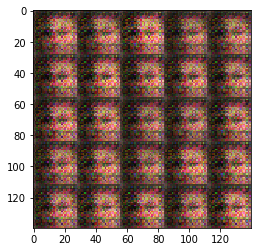

Epoch 1/1... Discriminator Loss: 0.2331... Generator Loss: 2.2003
Epoch 1/1... Discriminator Loss: 0.1260... Generator Loss: 2.8686
Epoch 1/1... Discriminator Loss: 0.0854... Generator Loss: 3.1447
Epoch 1/1... Discriminator Loss: 0.1730... Generator Loss: 2.4286
Epoch 1/1... Discriminator Loss: 0.0948... Generator Loss: 3.1365
Epoch 1/1... Discriminator Loss: 0.0547... Generator Loss: 3.5691
Epoch 1/1... Discriminator Loss: 0.1130... Generator Loss: 2.8572
Epoch 1/1... Discriminator Loss: 0.0890... Generator Loss: 3.3934
Epoch 1/1... Discriminator Loss: 0.3774... Generator Loss: 1.7601
Epoch 1/1... Discriminator Loss: 0.2487... Generator Loss: 2.6157


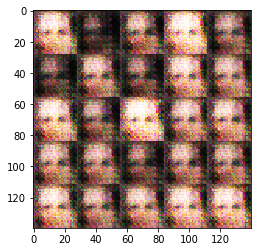

Epoch 1/1... Discriminator Loss: 0.8830... Generator Loss: 4.7777
Epoch 1/1... Discriminator Loss: 0.3065... Generator Loss: 2.2324
Epoch 1/1... Discriminator Loss: 0.4193... Generator Loss: 2.9990
Epoch 1/1... Discriminator Loss: 0.3931... Generator Loss: 3.2990
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 4.1566
Epoch 1/1... Discriminator Loss: 0.4544... Generator Loss: 1.3619
Epoch 1/1... Discriminator Loss: 0.2051... Generator Loss: 2.9668
Epoch 1/1... Discriminator Loss: 0.2227... Generator Loss: 2.5126
Epoch 1/1... Discriminator Loss: 0.2936... Generator Loss: 2.1488
Epoch 1/1... Discriminator Loss: 0.3187... Generator Loss: 2.4321


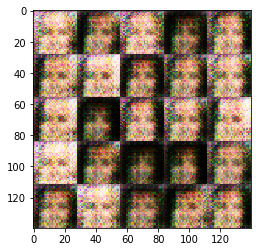

Epoch 1/1... Discriminator Loss: 0.2080... Generator Loss: 3.0035
Epoch 1/1... Discriminator Loss: 0.5503... Generator Loss: 1.6438
Epoch 1/1... Discriminator Loss: 0.3075... Generator Loss: 1.7906
Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 1.6310
Epoch 1/1... Discriminator Loss: 0.4462... Generator Loss: 3.7665
Epoch 1/1... Discriminator Loss: 0.4997... Generator Loss: 1.3438
Epoch 1/1... Discriminator Loss: 0.4210... Generator Loss: 2.0047
Epoch 1/1... Discriminator Loss: 0.4963... Generator Loss: 1.6253
Epoch 1/1... Discriminator Loss: 0.4886... Generator Loss: 1.8208
Epoch 1/1... Discriminator Loss: 0.4606... Generator Loss: 2.0170


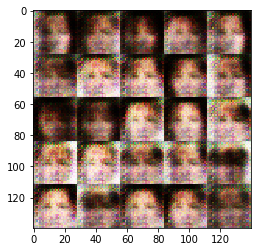

Epoch 1/1... Discriminator Loss: 0.4498... Generator Loss: 1.9080
Epoch 1/1... Discriminator Loss: 1.0280... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.0539... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 0.7697
Epoch 1/1... Discriminator Loss: 0.8068... Generator Loss: 1.9460
Epoch 1/1... Discriminator Loss: 1.6194... Generator Loss: 3.1401
Epoch 1/1... Discriminator Loss: 0.4868... Generator Loss: 2.0920
Epoch 1/1... Discriminator Loss: 0.7696... Generator Loss: 1.2551
Epoch 1/1... Discriminator Loss: 0.9246... Generator Loss: 0.9761
Epoch 1/1... Discriminator Loss: 0.6093... Generator Loss: 1.4957


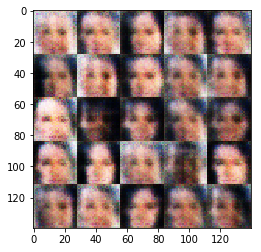

Epoch 1/1... Discriminator Loss: 0.6951... Generator Loss: 1.3062
Epoch 1/1... Discriminator Loss: 0.6276... Generator Loss: 1.7181
Epoch 1/1... Discriminator Loss: 0.4196... Generator Loss: 1.7665
Epoch 1/1... Discriminator Loss: 0.8509... Generator Loss: 1.3350
Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 0.5648
Epoch 1/1... Discriminator Loss: 0.6401... Generator Loss: 1.2935
Epoch 1/1... Discriminator Loss: 0.8627... Generator Loss: 1.6220
Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 1.8488
Epoch 1/1... Discriminator Loss: 1.0287... Generator Loss: 0.6095
Epoch 1/1... Discriminator Loss: 0.3970... Generator Loss: 2.1195


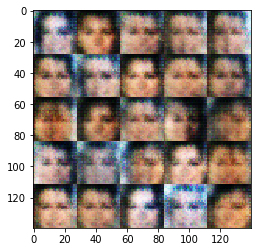

Epoch 1/1... Discriminator Loss: 0.5926... Generator Loss: 1.6404
Epoch 1/1... Discriminator Loss: 0.7978... Generator Loss: 2.0997
Epoch 1/1... Discriminator Loss: 0.5702... Generator Loss: 2.0441
Epoch 1/1... Discriminator Loss: 1.0410... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.8680
Epoch 1/1... Discriminator Loss: 1.1906... Generator Loss: 1.4075
Epoch 1/1... Discriminator Loss: 1.0383... Generator Loss: 0.9994
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.9249
Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 1.3255
Epoch 1/1... Discriminator Loss: 0.8125... Generator Loss: 1.0262


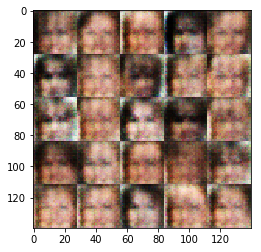

Epoch 1/1... Discriminator Loss: 0.6006... Generator Loss: 2.0567
Epoch 1/1... Discriminator Loss: 0.5448... Generator Loss: 1.5037
Epoch 1/1... Discriminator Loss: 0.7046... Generator Loss: 2.1487
Epoch 1/1... Discriminator Loss: 0.6308... Generator Loss: 1.9746
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 1.2221
Epoch 1/1... Discriminator Loss: 0.9757... Generator Loss: 1.1428
Epoch 1/1... Discriminator Loss: 0.7773... Generator Loss: 1.3450
Epoch 1/1... Discriminator Loss: 0.8480... Generator Loss: 1.5853
Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 0.8797... Generator Loss: 1.1974


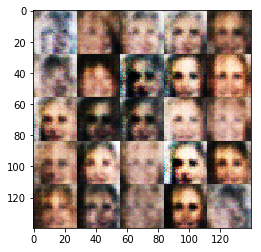

Epoch 1/1... Discriminator Loss: 0.7758... Generator Loss: 1.3068
Epoch 1/1... Discriminator Loss: 0.7455... Generator Loss: 1.7992
Epoch 1/1... Discriminator Loss: 0.9357... Generator Loss: 1.2445
Epoch 1/1... Discriminator Loss: 0.6098... Generator Loss: 1.4581
Epoch 1/1... Discriminator Loss: 0.8134... Generator Loss: 1.0852
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 1.6331
Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 1.3290
Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 1.0368
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 1.7635
Epoch 1/1... Discriminator Loss: 0.8294... Generator Loss: 1.3513


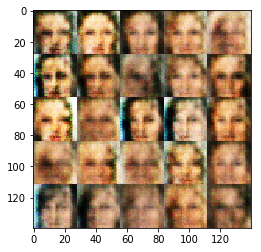

Epoch 1/1... Discriminator Loss: 0.9226... Generator Loss: 1.0419
Epoch 1/1... Discriminator Loss: 0.9163... Generator Loss: 1.1397
Epoch 1/1... Discriminator Loss: 0.7382... Generator Loss: 1.6024
Epoch 1/1... Discriminator Loss: 0.9611... Generator Loss: 1.2317
Epoch 1/1... Discriminator Loss: 0.7370... Generator Loss: 1.9903
Epoch 1/1... Discriminator Loss: 1.1351... Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 1.0735... Generator Loss: 0.9415
Epoch 1/1... Discriminator Loss: 0.8395... Generator Loss: 1.3812
Epoch 1/1... Discriminator Loss: 0.9626... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 0.7311... Generator Loss: 1.3049


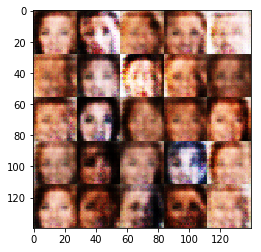

Epoch 1/1... Discriminator Loss: 0.8988... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 0.7834... Generator Loss: 1.2575
Epoch 1/1... Discriminator Loss: 1.1552... Generator Loss: 1.0435
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 1.0939
Epoch 1/1... Discriminator Loss: 0.9495... Generator Loss: 1.0917
Epoch 1/1... Discriminator Loss: 0.9126... Generator Loss: 1.3534
Epoch 1/1... Discriminator Loss: 0.9633... Generator Loss: 1.2150
Epoch 1/1... Discriminator Loss: 0.8107... Generator Loss: 1.1002
Epoch 1/1... Discriminator Loss: 0.9896... Generator Loss: 0.8576


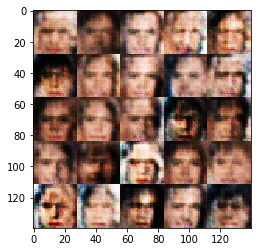

Epoch 1/1... Discriminator Loss: 1.0809... Generator Loss: 0.7704
Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 1.1916
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 1.2332
Epoch 1/1... Discriminator Loss: 0.9205... Generator Loss: 1.3476
Epoch 1/1... Discriminator Loss: 0.9155... Generator Loss: 1.3515
Epoch 1/1... Discriminator Loss: 0.7584... Generator Loss: 1.0987
Epoch 1/1... Discriminator Loss: 1.0657... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 0.7624... Generator Loss: 1.4508
Epoch 1/1... Discriminator Loss: 0.8305... Generator Loss: 1.1678
Epoch 1/1... Discriminator Loss: 0.7701... Generator Loss: 1.1658


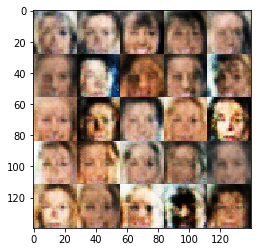

Epoch 1/1... Discriminator Loss: 0.8355... Generator Loss: 1.0766
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 1.5483
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 0.9562
Epoch 1/1... Discriminator Loss: 0.9523... Generator Loss: 1.1426
Epoch 1/1... Discriminator Loss: 0.7978... Generator Loss: 1.1076
Epoch 1/1... Discriminator Loss: 1.1983... Generator Loss: 0.7273
Epoch 1/1... Discriminator Loss: 0.9385... Generator Loss: 1.4800
Epoch 1/1... Discriminator Loss: 0.9288... Generator Loss: 1.7804
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 0.7873
Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 1.0990


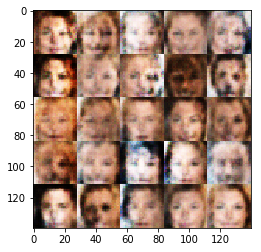

Epoch 1/1... Discriminator Loss: 1.0153... Generator Loss: 1.4737
Epoch 1/1... Discriminator Loss: 0.9795... Generator Loss: 1.5668
Epoch 1/1... Discriminator Loss: 1.0173... Generator Loss: 0.9747
Epoch 1/1... Discriminator Loss: 0.8486... Generator Loss: 1.1375
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.0023... Generator Loss: 1.0146
Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 0.9444... Generator Loss: 1.0436
Epoch 1/1... Discriminator Loss: 0.9479... Generator Loss: 1.1101
Epoch 1/1... Discriminator Loss: 0.8243... Generator Loss: 1.7163


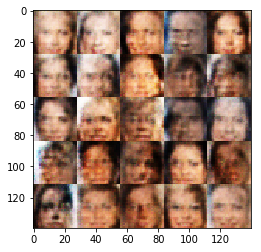

Epoch 1/1... Discriminator Loss: 0.9622... Generator Loss: 1.0661
Epoch 1/1... Discriminator Loss: 0.7926... Generator Loss: 1.1864
Epoch 1/1... Discriminator Loss: 0.7005... Generator Loss: 1.3989
Epoch 1/1... Discriminator Loss: 0.6719... Generator Loss: 1.7694
Epoch 1/1... Discriminator Loss: 0.9127... Generator Loss: 1.4246
Epoch 1/1... Discriminator Loss: 0.8553... Generator Loss: 1.3252
Epoch 1/1... Discriminator Loss: 1.0363... Generator Loss: 1.1934
Epoch 1/1... Discriminator Loss: 0.9373... Generator Loss: 1.3239
Epoch 1/1... Discriminator Loss: 0.9473... Generator Loss: 1.2145
Epoch 1/1... Discriminator Loss: 0.9322... Generator Loss: 1.3710


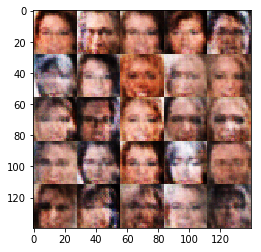

Epoch 1/1... Discriminator Loss: 0.9351... Generator Loss: 1.2096
Epoch 1/1... Discriminator Loss: 0.8920... Generator Loss: 0.9803
Epoch 1/1... Discriminator Loss: 0.8182... Generator Loss: 2.0547
Epoch 1/1... Discriminator Loss: 1.0174... Generator Loss: 0.9679
Epoch 1/1... Discriminator Loss: 1.0169... Generator Loss: 1.0448
Epoch 1/1... Discriminator Loss: 1.1043... Generator Loss: 1.0533
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 0.8902
Epoch 1/1... Discriminator Loss: 1.1747... Generator Loss: 1.2596
Epoch 1/1... Discriminator Loss: 1.0215... Generator Loss: 0.9590
Epoch 1/1... Discriminator Loss: 0.7710... Generator Loss: 1.3980


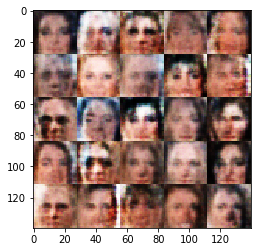

Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 1.0468
Epoch 1/1... Discriminator Loss: 1.1934... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.1316... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.0079... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 1.0200... Generator Loss: 1.5461
Epoch 1/1... Discriminator Loss: 0.9783... Generator Loss: 1.3947
Epoch 1/1... Discriminator Loss: 0.8561... Generator Loss: 1.5981
Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 0.8261
Epoch 1/1... Discriminator Loss: 0.9720... Generator Loss: 0.8774


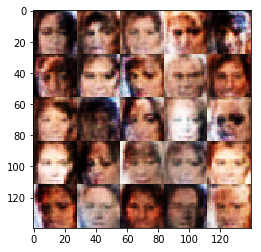

Epoch 1/1... Discriminator Loss: 1.0321... Generator Loss: 1.0907
Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.2078... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.0648... Generator Loss: 0.8311
Epoch 1/1... Discriminator Loss: 0.9729... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 0.8364... Generator Loss: 0.9992
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 1.6841
Epoch 1/1... Discriminator Loss: 0.9392... Generator Loss: 1.2691
Epoch 1/1... Discriminator Loss: 1.0393... Generator Loss: 0.8412
Epoch 1/1... Discriminator Loss: 0.9209... Generator Loss: 1.0598


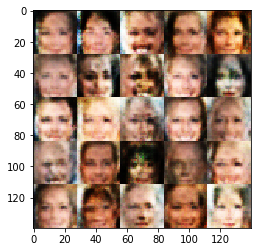

Epoch 1/1... Discriminator Loss: 0.8520... Generator Loss: 1.3674
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 1.0944
Epoch 1/1... Discriminator Loss: 0.8891... Generator Loss: 1.3729
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 1.0061
Epoch 1/1... Discriminator Loss: 0.9985... Generator Loss: 0.9663
Epoch 1/1... Discriminator Loss: 0.9036... Generator Loss: 0.8724
Epoch 1/1... Discriminator Loss: 0.7921... Generator Loss: 1.3306
Epoch 1/1... Discriminator Loss: 1.1105... Generator Loss: 1.3951
Epoch 1/1... Discriminator Loss: 0.7433... Generator Loss: 1.2047
Epoch 1/1... Discriminator Loss: 1.1022... Generator Loss: 1.2149


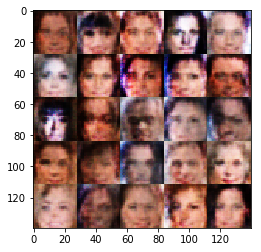

Epoch 1/1... Discriminator Loss: 1.0460... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 0.9074
Epoch 1/1... Discriminator Loss: 0.9353... Generator Loss: 1.6565
Epoch 1/1... Discriminator Loss: 0.8680... Generator Loss: 1.2684
Epoch 1/1... Discriminator Loss: 0.8750... Generator Loss: 1.3939
Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 1.1809
Epoch 1/1... Discriminator Loss: 1.0480... Generator Loss: 1.0275
Epoch 1/1... Discriminator Loss: 0.9629... Generator Loss: 0.9107
Epoch 1/1... Discriminator Loss: 1.0340... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 1.6616


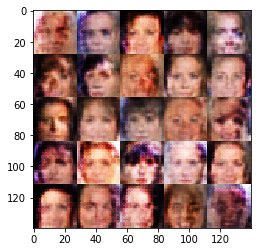

Epoch 1/1... Discriminator Loss: 0.9042... Generator Loss: 1.0278
Epoch 1/1... Discriminator Loss: 0.8549... Generator Loss: 1.0738
Epoch 1/1... Discriminator Loss: 1.1312... Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 0.8003
Epoch 1/1... Discriminator Loss: 0.8893... Generator Loss: 1.2360
Epoch 1/1... Discriminator Loss: 1.1438... Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 0.8258... Generator Loss: 1.2732
Epoch 1/1... Discriminator Loss: 1.0619... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 0.8059... Generator Loss: 1.3014
Epoch 1/1... Discriminator Loss: 1.1748... Generator Loss: 1.2594


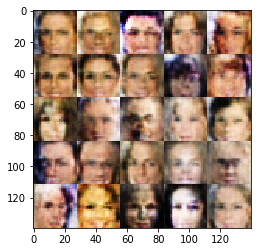

Epoch 1/1... Discriminator Loss: 1.0518... Generator Loss: 1.7239
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 1.0727
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 0.9769
Epoch 1/1... Discriminator Loss: 0.9821... Generator Loss: 0.9131
Epoch 1/1... Discriminator Loss: 0.8382... Generator Loss: 1.1135
Epoch 1/1... Discriminator Loss: 0.9153... Generator Loss: 1.0606
Epoch 1/1... Discriminator Loss: 1.2259... Generator Loss: 0.5824
Epoch 1/1... Discriminator Loss: 0.9415... Generator Loss: 1.3702
Epoch 1/1... Discriminator Loss: 0.8650... Generator Loss: 1.3063
Epoch 1/1... Discriminator Loss: 0.9249... Generator Loss: 0.9241


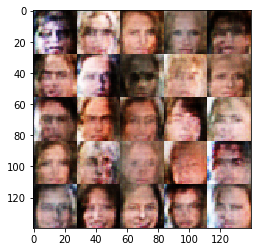

Epoch 1/1... Discriminator Loss: 0.8965... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 0.7636... Generator Loss: 1.1765
Epoch 1/1... Discriminator Loss: 0.9654... Generator Loss: 0.9223
Epoch 1/1... Discriminator Loss: 0.9365... Generator Loss: 1.0651
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 0.9888
Epoch 1/1... Discriminator Loss: 1.0533... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 0.9646... Generator Loss: 1.4925
Epoch 1/1... Discriminator Loss: 0.8765... Generator Loss: 0.9642
Epoch 1/1... Discriminator Loss: 1.1279... Generator Loss: 0.6769
Epoch 1/1... Discriminator Loss: 0.7635... Generator Loss: 1.2550


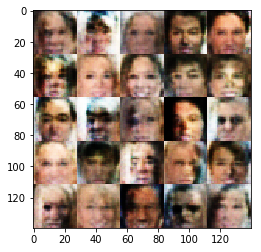

Epoch 1/1... Discriminator Loss: 0.9740... Generator Loss: 0.9833
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 0.8383
Epoch 1/1... Discriminator Loss: 0.8126... Generator Loss: 0.9785
Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.9470
Epoch 1/1... Discriminator Loss: 0.7875... Generator Loss: 1.1766
Epoch 1/1... Discriminator Loss: 0.8761... Generator Loss: 0.8603
Epoch 1/1... Discriminator Loss: 1.0562... Generator Loss: 0.8868
Epoch 1/1... Discriminator Loss: 0.8051... Generator Loss: 1.6276
Epoch 1/1... Discriminator Loss: 0.9650... Generator Loss: 1.1117
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.0836


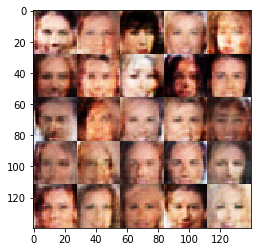

Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 1.0852
Epoch 1/1... Discriminator Loss: 0.8147... Generator Loss: 1.2369
Epoch 1/1... Discriminator Loss: 0.8000... Generator Loss: 1.0500
Epoch 1/1... Discriminator Loss: 0.8430... Generator Loss: 1.3841
Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 0.6568
Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 1.4581
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.0344
Epoch 1/1... Discriminator Loss: 0.7603... Generator Loss: 1.1763
Epoch 1/1... Discriminator Loss: 0.8292... Generator Loss: 1.2493
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 0.9966


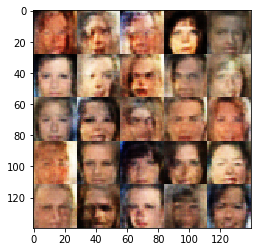

Epoch 1/1... Discriminator Loss: 1.0670... Generator Loss: 0.9247
Epoch 1/1... Discriminator Loss: 0.9810... Generator Loss: 0.9804
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 0.7017
Epoch 1/1... Discriminator Loss: 0.8961... Generator Loss: 1.1736
Epoch 1/1... Discriminator Loss: 0.8892... Generator Loss: 0.8257
Epoch 1/1... Discriminator Loss: 0.8539... Generator Loss: 1.1288
Epoch 1/1... Discriminator Loss: 0.9392... Generator Loss: 0.9352
Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 0.8827
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 0.8516
Epoch 1/1... Discriminator Loss: 0.9159... Generator Loss: 1.0160


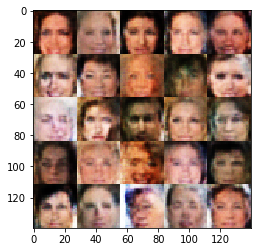

Epoch 1/1... Discriminator Loss: 0.9806... Generator Loss: 0.9950
Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 1.3042
Epoch 1/1... Discriminator Loss: 0.6498... Generator Loss: 1.2808
Epoch 1/1... Discriminator Loss: 0.8779... Generator Loss: 1.0214
Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 0.7347
Epoch 1/1... Discriminator Loss: 0.9378... Generator Loss: 0.9121
Epoch 1/1... Discriminator Loss: 0.9476... Generator Loss: 1.0435
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 0.8014
Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 0.5312
Epoch 1/1... Discriminator Loss: 0.7708... Generator Loss: 1.4929


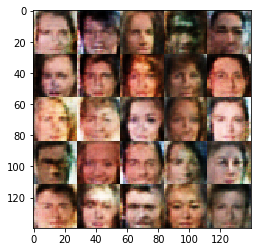

Epoch 1/1... Discriminator Loss: 0.8815... Generator Loss: 0.9136
Epoch 1/1... Discriminator Loss: 0.7868... Generator Loss: 1.1696
Epoch 1/1... Discriminator Loss: 1.0503... Generator Loss: 0.8094
Epoch 1/1... Discriminator Loss: 0.7859... Generator Loss: 1.1854
Epoch 1/1... Discriminator Loss: 0.7790... Generator Loss: 1.2222
Epoch 1/1... Discriminator Loss: 0.9495... Generator Loss: 1.2841
Epoch 1/1... Discriminator Loss: 1.0162... Generator Loss: 1.3783
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.7207
Epoch 1/1... Discriminator Loss: 0.9356... Generator Loss: 1.3641
Epoch 1/1... Discriminator Loss: 1.1731... Generator Loss: 0.7393


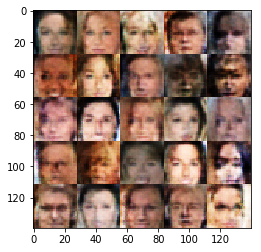

Epoch 1/1... Discriminator Loss: 1.1722... Generator Loss: 0.7533
Epoch 1/1... Discriminator Loss: 1.1212... Generator Loss: 1.3127
Epoch 1/1... Discriminator Loss: 0.8504... Generator Loss: 1.2202
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 0.9169
Epoch 1/1... Discriminator Loss: 1.0003... Generator Loss: 1.2961
Epoch 1/1... Discriminator Loss: 0.8079... Generator Loss: 1.5908
Epoch 1/1... Discriminator Loss: 1.1198... Generator Loss: 0.8744
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 1.3445
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 1.2519
Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.5301


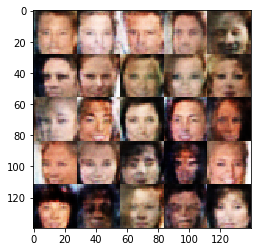

Epoch 1/1... Discriminator Loss: 0.9070... Generator Loss: 0.9914
Epoch 1/1... Discriminator Loss: 1.1271... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 0.8832
Epoch 1/1... Discriminator Loss: 1.0363... Generator Loss: 1.3498
Epoch 1/1... Discriminator Loss: 1.0449... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 0.8431... Generator Loss: 1.6068
Epoch 1/1... Discriminator Loss: 1.3524... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 0.8546... Generator Loss: 1.2725
Epoch 1/1... Discriminator Loss: 1.1537... Generator Loss: 0.6022
Epoch 1/1... Discriminator Loss: 1.0233... Generator Loss: 0.7598


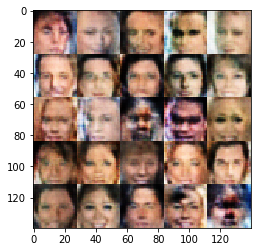

Epoch 1/1... Discriminator Loss: 1.0258... Generator Loss: 0.7207
Epoch 1/1... Discriminator Loss: 0.8472... Generator Loss: 1.0173
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.0449... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 0.9170... Generator Loss: 0.8711


In [14]:
batch_size =64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.